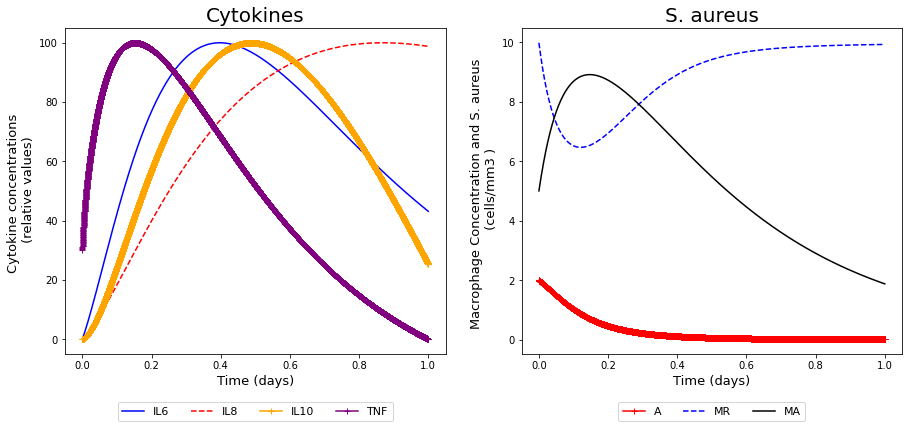

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Some setting for the small code
ttot = 1

# Dirty copy of all constans
k_MA = 2.51
k_MR = 6
MR_max = 5
deltaT = pow(10, -4)

# Initial condition
A = 2.0
MA = 5
MR = 10
TNF = 0.17
IL_10 = 0.7
IL_6 = 0
IL_8 = 0

n_610 = 34.8
n_66 = 560
n_6TNF = 185
n_810 = 17.4
n_8TNF = 185
n_106 = 560
n_TNF10 = 17.4
n_TNF6 = 560
n_M10 = 4.35
n_MTNF = 0.1

h_106 = 3.68
h_6TNF = 2
h_66 = 1
h_610 = 4
h_8TNF = 3
h_810 = 1.5
h_TNF10 = 3
h_TNF6 = 2
h_M10 = 0.3
h_MTNF = 3.16

k_TNFM = 1.5
k_TNF = 200
q_TNF = 0.14

k_6m = 0.01
k_6TNF = 0.81
k_6 = 4.64
q_IL6 = 0.6

k_8m = 0.056
k_8TNF = 0.56
k_8 = 0.464
q_IL8 = 0.2

k_10m = 0.19
k_106 = 0.191
k_10 = 1.1
q_IL10 = 0.15

beta_A = 0.02
k_A = 50.0
m_A = 0.9
m_Mr = 0.033
m_Ma = 0.07
k_m = 0.0414
k_MTNF = 8.65

lambda_afma = 7.14 * pow(10, -2)
lambda_afmr = 1.66 * pow(10, -3)
alpha_f = 0.43

t = 0

# All vectors storing data for A,MR,MA,F,IL8,IL10,IL6, TNF, and t, since
# they have the same length, I just set all equal to Sto_A

num_term = int((ttot - t) / deltaT)
out_A = [0] * ((num_term) + 1)
out_MA = [0] * ((num_term) + 1)
out_MR = [0] * ((num_term) + 1)
out_IL10 = [0] * ((num_term) + 1)
out_IL8 = [0] * ((num_term) + 1)
out_IL6 = [0] * ((num_term) + 1)
out_TNF = [0] * ((num_term) + 1)
out_t = [0] * ((num_term) + 1)

out_A[0] = 100000000
out_MA[0] = MA
out_MR[0] = MR
out_IL10[0] = IL10
out_IL6[0] = IL6
out_IL8[0] = IL8
out_TNF[0] = TNF
out_t[0] = t
turn = 0

while t < ttot:

    # We need to add the terms that will represent that the bacteria
    # will reduce with phagocitosys. I have added this last term
    # but we need to check that
    Anext = (beta_A * (1 - (A / k_A)) * A - m_A * A * MA) * deltaT + A
    # print(Anext)
    # BMQ -> Regarding macrophages I believe the terms that show at
    # the equations of the cytokynes multiplying them should also
    # be present at their equations. Please check that!
    MAnext = ((k_m + k_MTNF * pow(TNF, h_MTNF) / (pow(n_MTNF, h_MTNF) + pow(TNF, h_MTNF)) * (pow(n_M10, h_M10) / (pow(n_M10, h_M10) + pow(IL10, h_M10)))) * MR * A - k_MA * MA) * deltaT + MA
    # I change this equation back because according to the signal map, IL-6, IL-10, IL-8, and TNF-alpha does not affect Macrophage directly
    # BMQ
    # I removed the logistic term to test
    MRnext = ((-(k_m + k_MTNF * (pow(TNF, h_MTNF) / (pow(n_MTNF, h_MTNF) + pow(TNF, h_MTNF))) * (pow(n_M10, h_M10) / (pow(n_M10, h_M10) + pow(IL10, h_M10)))) * MR * A + k_MR * MR) + k_MR * MR * (1 - MR / MR_max)) * deltaT + MR
    # BMQ
    # I also edited the equations of the citokynes
    IL10next = ((k_10m + k_106 * (pow(IL6, h_106) / (pow(n_106, h_106) + pow(IL6, h_106)))) * MA - k_10 * (IL10 - q_IL10)) * deltaT + IL10
    IL6next = ((k_6m + k_6TNF * (pow(TNF, h_6TNF) / (pow(n_6TNF, h_6TNF) + pow(TNF, h_6TNF))) * (pow(n_66, h_66) / (pow(n_66, h_66) + pow(IL6, h_66))) * (pow(n_610, h_610) / (pow(n_610, h_610) + pow(IL10, n_610)))) * MA - k_6 * (IL6 - q_IL6)) * deltaT + IL6
    IL8next = ((k_8m + k_8TNF * (pow(TNF, h_8TNF) / (pow(TNF, h_8TNF) + pow(n_8TNF, h_8TNF))) * (pow(n_810, h_810) / (pow(n_810, h_810) + pow(IL10, h_810)))) * MA - k_8 * (IL8 - q_IL8)) * deltaT + IL8
    TNFnext = ((k_TNFM * (pow(n_TNF6, h_TNF6) / (pow(n_TNF6, h_TNF6) + pow(IL6, h_TNF6))) * (pow(n_TNF10, h_TNF10) / (pow(n_TNF10, h_TNF10) + pow(IL10, h_TNF10)))) * MA - k_TNF * (TNF - q_TNF)) * deltaT + TNF
    # BMQ
    # that function that was used before was causing discontinuity
    # at some points so I removed
    t = t + deltaT

    # update the data
    out_A[turn] = Anext
    out_MR[turn] = MRnext
    out_MA[turn] = MAnext
    out_IL6[turn] = IL6next
    out_IL8[turn] = IL8next
    out_IL10[turn] = IL10next
    out_TNF[turn] = TNFnext
    out_t[turn] = t

    turn = turn + 1

    TNF = TNFnext
    IL8 = IL8next
    IL6 = IL6next
    IL10 = IL10next
    MR = MRnext
    MA = MAnext
    A = Anext

max_TNF = max(out_TNF)
max_IL8 = max(out_IL8)
max_IL6 = max(out_IL6)
max_IL10 = max(out_IL10)
min_TNF = min(out_TNF)
min_IL8 = min(out_IL8)
min_IL6 = min(out_IL6)
min_IL10 = min(out_IL10)

for k in range(len(out_TNF)):
    out_TNF[k] = 100 * (out_TNF[k] - min_TNF) / (max_TNF - min_TNF)
    out_IL6[k] = 100 * (out_IL6[k] - min_IL6) / (max_IL6 - min_IL6)
    out_IL8[k] = 100 * (out_IL8[k] - min_IL8) / (max_IL8 - min_IL8)
    out_IL10[k] = 100 * (out_IL10[k] - min_IL10) / (max_IL10 - min_IL10)

time = np.arange(0,1+deltaT,deltaT)


fig, (ax1, ax2) = plt.subplots(1, 2)

#Cytokines
ax1.plot(time, out_IL6, 'b', label="IL6")
ax1.plot(time, out_IL8, 'r--', label="IL8")
ax1.plot(time, out_IL10, 'orange' , marker = '+', label="IL10")
ax1.plot(time, out_TNF,'purple' , marker = '+', label="TNF")

ax1.set_title("Cytokines", fontsize = 20)
ax1.set_xlabel('Time (days)', fontsize = 13)
ax1.set_ylabel('Cytokine concentrations \n (relative values)', fontsize = 13)
ax1.legend( ncol = 4, bbox_to_anchor = (0.5,-0.13), loc='upper center', fontsize = 11)

#S.aureus
ax2.plot(time,out_A,'r' , marker = '+', label="A")
ax2.plot(time,out_MR, 'b--', label="MR")
ax2.plot(time,out_MA, 'black', label="MA")

ax2.set_title("S. aureus", fontsize = 20)
ax2.set_xlabel('Time (days)', fontsize = 13)
ax2.set_ylabel('Macrophage Concentration and S. aureus \n (cells/mm3 )', fontsize = 13)
ax2.legend( ncol = 4, bbox_to_anchor = (0.5,-0.13), loc='upper center', fontsize = 11)


fig.set_figwidth(15) 
fig.set_figheight(6) 
plt.show()
